In [1]:
# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0762112s

In [2]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo ustrezno preimenovali stolpce (nadomestitev šumnikov, določitev smiselnih poimenovanj stolpcev)
# V posameznih celicah, ki so po pretvorbi v .csv datoteko bile v 'date' formatu, smo ustrezno pretvorili v številskega

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
brezposelnost = pd.read_csv("../../podatki/brezposelnost/brezposelnost.csv", sep = ";")

# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo 'M' iz same vrednosti – npr. namesto '5.6 M' bo sedaj vrednost '5.6'
brezposelnost.iloc[:, 1:] = brezposelnost.iloc[:, 1:].applymap(lambda x: x.replace('M', '') if isinstance(x, str) else x)

# Pretvorimo stolpec 'LETO' v tip integer
brezposelnost['LETO'] = brezposelnost['LETO'].astype(int)
# Pretvorimo vse ostale stolpce v tip float
brezposelnost.iloc[:, 1:] = brezposelnost.iloc[:, 1:].astype(float)

In [3]:
# Pregled urejenih in filtriranih podatkov
brezposelnost

,LETO,"OSNOVNOSOLSKA, MOSKI, VZHODNA SLOVENIJA","OSNOVNOSOLSKA, MOSKI, ZAHODNA SLOVENIJA","OSNOVNOSOLSKA, ZENSKE, VZHODNA SLOVENIJA","OSNOVNOSOLSKA, ZENSKE, ZAHODNA SLOVENIJA","NIZJA ALI SREDNJA POKLICNA, MOSKI, VZHODNA SLOVENIJA","NIZJA ALI SREDNJA POKLICNA, MOSKI, ZAHODNA SLOVENIJA","NIZJA ALI SREDNJA POKLICNA, ZENSKE, VZHODNA SLOVENIJA","NIZJA ALI SREDNJA POKLICNA, ZENSKE, ZAHODNA SLOVENIJA","SREDNJA STROKOVNA, SPLOSNA, MOSKI, VZHODNA SLOVENIJA","SREDNJA STROKOVNA, SPLOSNA, MOSKI, ZAHODNA SLOVENIJA","SREDNJA STROKOVNA, SPLOSNA, ZENSKE, VZHODNA SLOVENIJA","SREDNJA STROKOVNA, SPLOSNA, ZENSKE, ZAHODNA SLOVENIJA","VISJESOLSKA, VISOKOSOLSKA, MOSKI, VZHODNA SLOVENIJA","VISJESOLSKA, VISOKOSOLSKA, MOSKI, ZAHODNA SLOVENIJA","VISJESOLSKA, VISOKOSOLSKA, ZENSKE, VZHODNA SLOVENIJA","VISJESOLSKA, VISOKOSOLSKA, ZENSKE, ZAHODNA SLOVENIJA"
0,2008,5.6,5.9,6.2,5.3,3.9,3.3,6.8,3.6,4.4,3.5,6.4,3.3,4.1,2.4,4.8,2.7
1,2009,7.0,11.9,7.1,6.9,6.9,5.5,8.8,5.6,6.1,5.4,8.7,3.9,3.7,2.6,4.2,2.6
2,2010,11.9,12.6,9.7,9.0,7.2,7.8,9.4,7.9,6.7,7.4,8.5,6.5,4.9,3.4,5.6,3.5
3,2011,14.0,13.5,8.7,15.5,9.5,8.1,13.8,8.8,8.3,6.3,10.3,6.7,4.4,5.1,6.5,3.5
4,2012,14.4,13.9,10.2,19.3,8.7,8.2,13.8,8.3,9.8,7.0,10.0,8.5,5.0,4.3,9.7,4.9
5,2013,16.7,17.4,16.4,18.3,12.1,9.9,13.0,12.2,9.0,7.5,13.8,10.2,6.0,4.3,9.1,5.3
6,2014,17.3,13.6,14.8,12.4,10.8,10.5,15.3,12.5,9.8,6.8,12.8,8.5,4.9,4.3,10.1,5.6
7,2015,14.3,14.5,15.3,11.6,8.8,7.6,16.3,13.2,10.2,6.5,11.5,9.9,4.5,4.6,8.9,4.8
8,2016,15.2,11.8,17.5,11.8,6.5,7.1,12.4,9.6,7.3,8.3,9.1,7.5,6.5,4.9,8.4,4.8
9,2017,11.5,12.1,10.5,8.7,5.5,6.4,10.1,8.5,5.5,5.9,8.5,7.4,3.8,4.3,6.4,5.4


In [4]:
# Pretvorba v .xlsx datoteko
# brezposelnost.to_excel("filtered_brezposelnost.xlsx")

<dtype: 'uint8'>


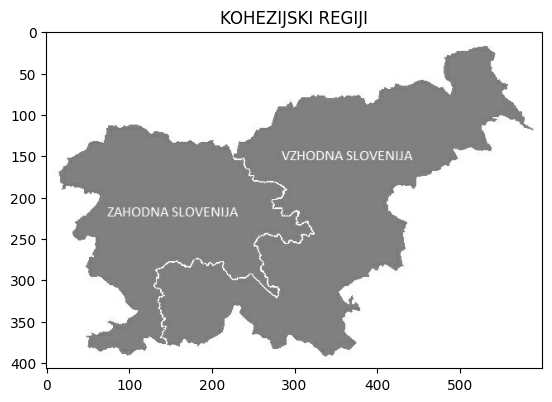

In [5]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
 
filterwarnings("ignore") 
tf_img = io.read_file("../../slike/kohezijski_regiji.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.title("KOHEZIJSKI REGIJI")
plt.imshow(tf_img)

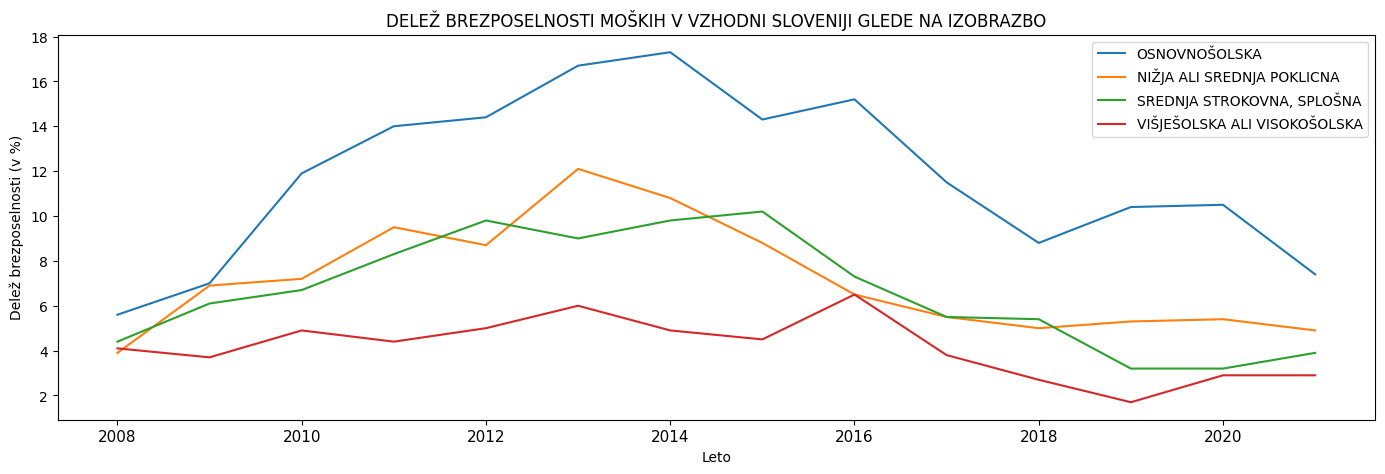

In [6]:
x_os = brezposelnost['LETO'].values
y_os1 = brezposelnost['OSNOVNOSOLSKA, MOSKI, VZHODNA SLOVENIJA'].values
y_os2 = brezposelnost['NIZJA ALI SREDNJA POKLICNA, MOSKI, VZHODNA SLOVENIJA'].values
y_os3 = brezposelnost['SREDNJA STROKOVNA, SPLOSNA, MOSKI, VZHODNA SLOVENIJA'].values
y_os4 = brezposelnost['VISJESOLSKA, VISOKOSOLSKA, MOSKI, VZHODNA SLOVENIJA'].values

# Izrišemo graf
plt.figure(figsize=(17, 5))
plt.plot(x_os, y_os1, label= "OSNOVNOŠOLSKA")
plt.plot(x_os, y_os2, label = "NIŽJA ALI SREDNJA POKLICNA")
plt.plot(x_os, y_os3, label = "SREDNJA STROKOVNA, SPLOŠNA")
plt.plot(x_os, y_os4, label = "VIŠJEŠOLSKA ALI VISOKOŠOLSKA")
plt.xticks(fontsize=11)
plt.xlabel('Leto')
plt.ylabel('Delež brezposelnosti (v %)')
plt.title('DELEŽ BREZPOSELNOSTI MOŠKIH V VZHODNI SLOVENIJI GLEDE NA IZOBRAZBO')
plt.legend()
plt.show()

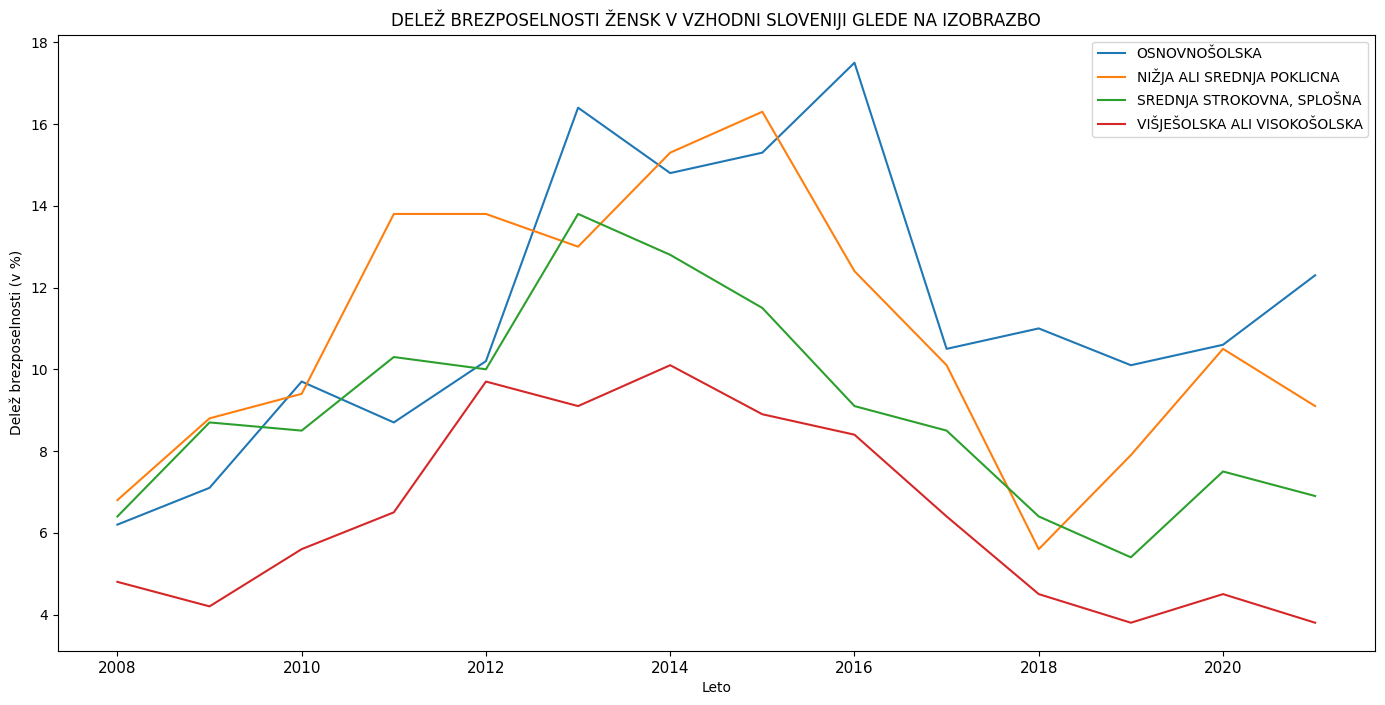

In [7]:
x_os = brezposelnost['LETO'].values
y_os1 = brezposelnost['OSNOVNOSOLSKA, ZENSKE, VZHODNA SLOVENIJA'].values
y_os2 = brezposelnost['NIZJA ALI SREDNJA POKLICNA, ZENSKE, VZHODNA SLOVENIJA'].values
y_os3 = brezposelnost['SREDNJA STROKOVNA, SPLOSNA, ZENSKE, VZHODNA SLOVENIJA'].values
y_os4 = brezposelnost['VISJESOLSKA, VISOKOSOLSKA, ZENSKE, VZHODNA SLOVENIJA'].values

# Izrišemo graf
plt.figure(figsize=(17, 8))
plt.plot(x_os, y_os1, label= "OSNOVNOŠOLSKA")
plt.plot(x_os, y_os2, label = "NIŽJA ALI SREDNJA POKLICNA")
plt.plot(x_os, y_os3, label = "SREDNJA STROKOVNA, SPLOŠNA")
plt.plot(x_os, y_os4, label = "VIŠJEŠOLSKA ALI VISOKOŠOLSKA")
plt.xticks(fontsize=11)
plt.xlabel('Leto')
plt.ylabel('Delež brezposelnosti (v %)')
plt.title('DELEŽ BREZPOSELNOSTI ŽENSK V VZHODNI SLOVENIJI GLEDE NA IZOBRAZBO')
plt.legend()
plt.show()

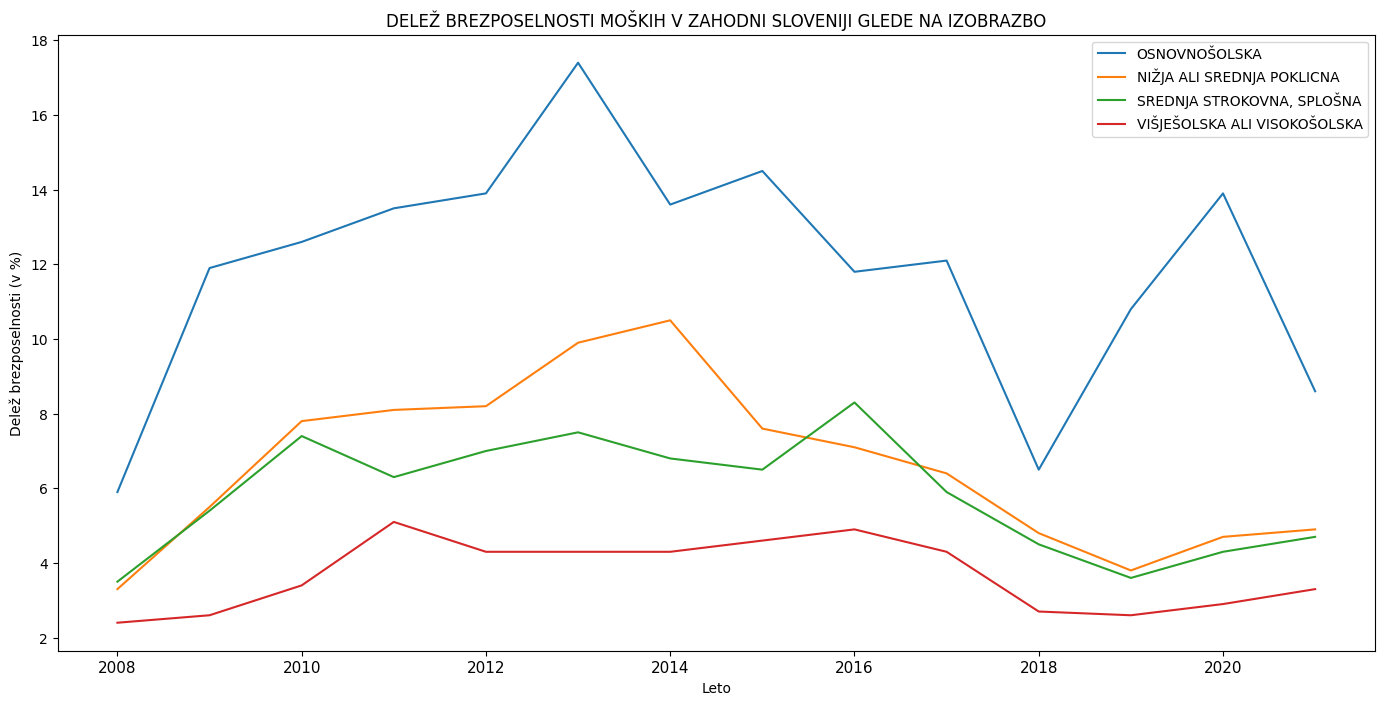

In [8]:
x_os = brezposelnost['LETO'].values
y_os1 = brezposelnost['OSNOVNOSOLSKA, MOSKI, ZAHODNA SLOVENIJA'].values
y_os2 = brezposelnost['NIZJA ALI SREDNJA POKLICNA, MOSKI, ZAHODNA SLOVENIJA'].values
y_os3 = brezposelnost['SREDNJA STROKOVNA, SPLOSNA, MOSKI, ZAHODNA SLOVENIJA'].values
y_os4 = brezposelnost['VISJESOLSKA, VISOKOSOLSKA, MOSKI, ZAHODNA SLOVENIJA'].values

# Izrišemo graf
plt.figure(figsize=(17, 8))
plt.plot(x_os, y_os1, label= "OSNOVNOŠOLSKA")
plt.plot(x_os, y_os2, label = "NIŽJA ALI SREDNJA POKLICNA")
plt.plot(x_os, y_os3, label = "SREDNJA STROKOVNA, SPLOŠNA")
plt.plot(x_os, y_os4, label = "VIŠJEŠOLSKA ALI VISOKOŠOLSKA")
plt.xticks(fontsize=11)
plt.xlabel('Leto')
plt.ylabel('Delež brezposelnosti (v %)')
plt.title('DELEŽ BREZPOSELNOSTI MOŠKIH V ZAHODNI SLOVENIJI GLEDE NA IZOBRAZBO')
plt.legend()
plt.show()

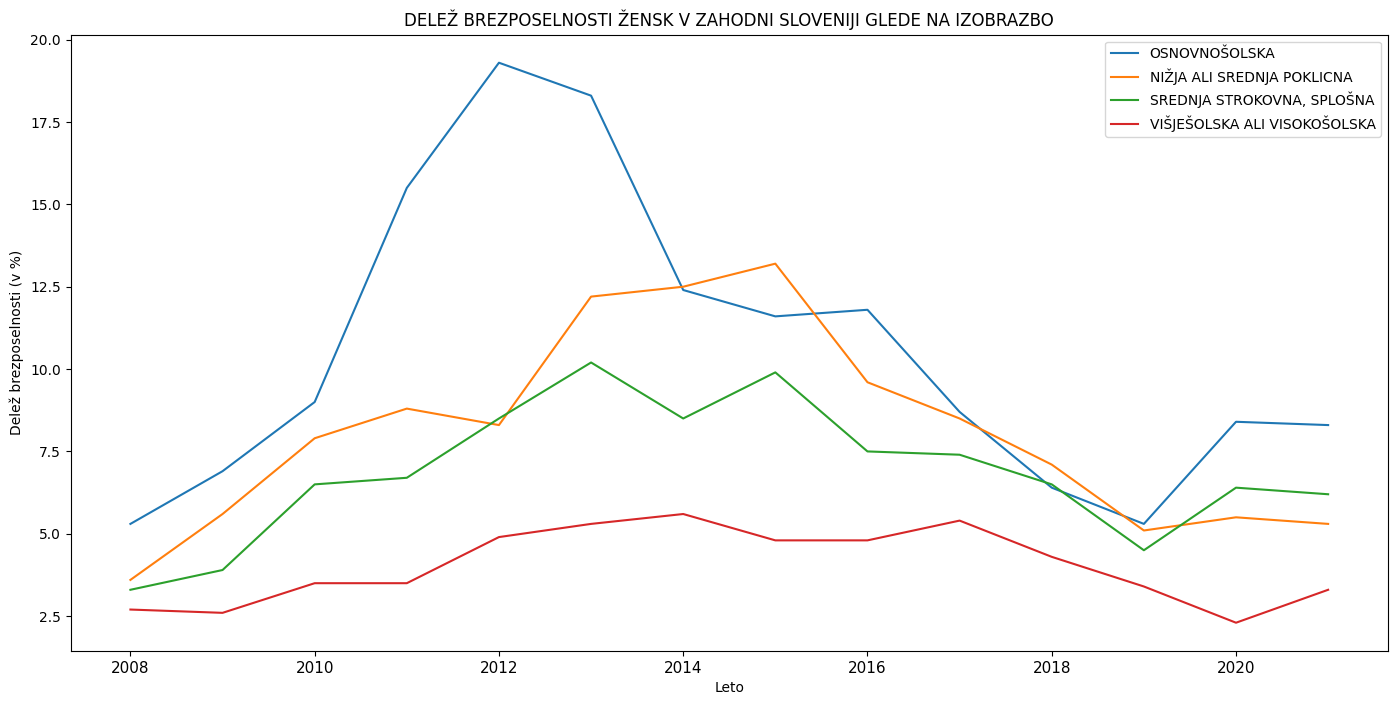

In [9]:
x_os = brezposelnost['LETO'].values
y_os1 = brezposelnost['OSNOVNOSOLSKA, ZENSKE, ZAHODNA SLOVENIJA'].values
y_os2 = brezposelnost['NIZJA ALI SREDNJA POKLICNA, ZENSKE, ZAHODNA SLOVENIJA'].values
y_os3 = brezposelnost['SREDNJA STROKOVNA, SPLOSNA, ZENSKE, ZAHODNA SLOVENIJA'].values
y_os4 = brezposelnost['VISJESOLSKA, VISOKOSOLSKA, ZENSKE, ZAHODNA SLOVENIJA'].values

# Izrišemo graf
plt.figure(figsize=(17, 8))
plt.plot(x_os, y_os1, label= "OSNOVNOŠOLSKA")
plt.plot(x_os, y_os2, label = "NIŽJA ALI SREDNJA POKLICNA")
plt.plot(x_os, y_os3, label = "SREDNJA STROKOVNA, SPLOŠNA")
plt.plot(x_os, y_os4, label = "VIŠJEŠOLSKA ALI VISOKOŠOLSKA")
plt.xticks(fontsize=11)
plt.xlabel('Leto')
plt.ylabel('Delež brezposelnosti (v %)')
plt.title('DELEŽ BREZPOSELNOSTI ŽENSK V ZAHODNI SLOVENIJI GLEDE NA IZOBRAZBO')
plt.legend()
plt.show()